In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

/home/nidhi/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pubmed=pd.read_csv("../data/dolphins/dolphins.csv",encoding = 'utf8',sep='\s+',header=None)
from sklearn.metrics import f1_score
def evaluation_dolphinsKNNLIB():
    Accuracy=dict()
    F1scoremacro=dict()
    F1scoremicro=dict()
    neigh = KNeighborsClassifier(n_neighbors=2)
    for i in [2,4,8,16]:
        filename =  '../Reduced_dim/dolphins2/dolphins_%d.csv'%(i,)
        print(filename)
        X=pd.read_csv(filename,encoding = 'utf8',header=None)
        y=pd.read_csv("../data/dolphins/dolphins_label.csv",encoding = 'utf8',names = ["label"])
        
        X = np.array(X)
        y = np.array(y)
    
        kf = KFold(y.shape[0],n_folds=10)
        
        
        accuracies=[]
        f1scoremacro=[]
        f1scoremicro=[]
        for train_index, validation_index in kf:
           #print("TRAIN:", train_index, "TEST:", test_index)
            
            #print(X)
            
            X_train, X_test = X[train_index], X[validation_index]
            y_train, y_test = y[train_index], y[validation_index]
            neigh.fit(X_train, y_train)
            y_pred = neigh.predict(X_test)
            
            
            accuracy = accuracy_score(y_test, y_pred)
            f1_scoremacro = f1_score(y_test, y_pred,average='macro')
            f1_scoremicro = f1_score(y_test, y_pred,average='micro')
            accuracies.append(accuracy)
            f1scoremacro.append(f1_scoremacro)
            f1scoremicro.append(f1_scoremicro)
            
            
            
        Accuracy[i]=sum(accuracies)/float(len(accuracies))
        F1scoremacro[i]=sum(f1scoremacro)/float(len(f1scoremacro))
        F1scoremicro[i]=sum(f1scoremicro)/float(len(f1scoremicro))
    return Accuracy,F1scoremacro,F1scoremicro


In [3]:
AccuracyKNNLIB,F1scoremacroKNNLIB,F1scoremicroKNNLIB = evaluation_dolphinsKNNLIB()

../Reduced_dim/dolphins2/dolphins_2.csv
../Reduced_dim/dolphins2/dolphins_4.csv
../Reduced_dim/dolphins2/dolphins_8.csv
../Reduced_dim/dolphins2/dolphins_16.csv


In [4]:
print(AccuracyKNNLIB)

{2: 0.8738095238095237, 4: 0.9023809523809524, 8: 0.8880952380952382, 16: 0.9047619047619049}


In [6]:
import pickle


f = open("evaluation_dolphinsKNNLIB", "wb")
pickle.dump(AccuracyKNNLIB,f)
pickle.dump(F1scoremacroKNNLIB, f)
pickle.dump(F1scoremicroKNNLIB,f)
f.close()

In [11]:
pubmed=pd.read_csv("../data/dolphins/dolphins.csv",encoding = 'utf8',sep='\s+',header=None)
from sklearn.metrics import f1_score
def evaluation_dolphinsNBLIB():
    Accuracy=dict()
    F1scoremacro=dict()
    F1scoremicro=dict()
    clf = GaussianNB() 
    for i in [2,4,8,16]:
        filename =  '../Reduced_dim/dolphins2/dolphins_%d.csv'%(i,)
        print(filename)
        X=pd.read_csv(filename,encoding = 'utf8',header=None)
        y=pd.read_csv("../data/dolphins/dolphins.csv",encoding = 'utf8',names = ["label"])
        
        X = np.array(X)
        y = np.array(y)
    
        kf = KFold(y.shape[0],n_folds=10)
        
        
        accuracies=[]
        f1scoremacro=[]
        f1scoremicro=[]
        for train_index, validation_index in kf:
           #print("TRAIN:", train_index, "TEST:", test_index)
            
            #print(X)
            
            X_train, X_test = X[train_index], X[validation_index]
            y_train, y_test = y[train_index], y[validation_index]
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            
            accuracy = accuracy_score(y_test, y_pred)
            f1_scoremacro = f1_score(y_test, y_pred,average='macro')
            f1_scoremicro = f1_score(y_test, y_pred,average='micro')
            accuracies.append(accuracy)
            f1scoremacro.append(f1_scoremacro)
            f1scoremicro.append(f1_scoremicro)
            
            
            
        Accuracy[i]=sum(accuracies)/float(len(accuracies))
        F1scoremacro[i]=sum(f1scoremacro)/float(len(f1scoremacro))
        F1scoremicro[i]=sum(f1scoremicro)/float(len(f1scoremicro))
    return Accuracy,F1scoremacro,F1scoremicro


In [12]:
AccuracyNBLIB,F1scoremacroNBLIB,F1scoremicroNBLIB = evaluation_dolphinsNBLIB()

../Reduced_dim/dolphins2/dolphins_2.csv


FileNotFoundError: File b'../Reduced_dim/dolphins2/dolphins_2.csv' does not exist

In [10]:
print(AccuracyNBLIB)

{2: 0.0, 4: 0.0, 8: 0.0, 16: 0.0}


In [9]:
import pickle


f = open("evaluation_dolphinsNBLIB", "wb")
pickle.dump(AccuracyNBLIB,f)
pickle.dump(F1scoremacroNBLIB, f)
pickle.dump(F1scoremicroNBLIB,f)
f.close()

In [15]:
shape=X.shape[1]
def kn(X_train,y_train,X_test,y_test):
    
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train) 
    y_predkn=neigh.predict(X_test)
    accuracykn = accuracy_score(y_test, y_predkn)
    f1scorekn = f1_score(y_test, y_predkn,average='macro')
    #print(accuracykn)
    #print(f1scorekn)
    return accuracykn,f1scorekn

def nb(X_train,y_train,X_test,y_test):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred,average='macro')
    return accuracy, f1score
    

In [28]:
#plotting graph
def builtGraph(shape):
    accuracieskn=[]
    f1scoreskn=[]
    accuraciesnb=[]
    f1scoresnb=[]
    dimensions=[]
    for r_projections in range(2,int(shape/2 +1),2):
        dimensions.append(r_projections)
        print(r_projections)
        #print(X_data)
        filename =  '/Users/Vikas/Desktop/tipr-first-assignment-master/Reduced_dim/dolphins/dolphins_%d.csv'%(r_projections,)
        X=pd.read_csv(filename,encoding = 'utf8',header=None)
        y=pd.read_csv("..\data\dolphins\dolphins_label.csv",encoding = 'utf8',sep='\s+',header=None)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        accuracykn,f1scorekn = kn(X_train,y_train,X_test,y_test)
        accuracieskn.append(accuracykn)
        f1scoreskn.append(f1scorekn)
        accuracynb,f1scorenb = nb(X_train,y_train,X_test,y_test)
        accuraciesnb.append(accuracynb)
        f1scoresnb.append(f1scorenb)
    return dimensions,accuracieskn,f1scoreskn,accuraciesnb,f1scoresnb
        



In [29]:
dimensions,accuracieskn,f1scoreskn,accuraciesnb,f1scoresnb = builtGraph(shape)

2
4
6

C:\Users\Vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



8
10
12
14
16


In [30]:
builtGraph(shape)

2
4
6
8
10
12
14
16


C:\Users\Vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


([2, 4, 6, 8, 10, 12, 14, 16],
 [0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313],
 [0.72222222222222221,
  0.72727272727272729,
  0.72727272727272729,
  0.72727272727272729,
  0.72727272727272729,
  0.72727272727272729,
  0.72727272727272729,
  0.72727272727272729],
 [0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313,
  0.92307692307692313],
 [0.72222222222222221,
  0.72727272727272729,
  0.72727272727272729,
  0.72727272727272729,
  0.72727272727272729,
  0.72727272727272729,
  0.72727272727272729,
  0.72727272727272729])

In [43]:
import matplotlib.pyplot as plt
def plot(dimensions,accuracieskn,f1scoreskn,accuraciesnb,f1scoresnb):
    #plt.figure(1)                # the first figure
    #plt.subplot(221)             # the first subplot in the first figure
    plt.plot(dimensions,accuracieskn)
    #plt.subplot(222)             # the second subplot in the first figure
    plt.plot(dimensions,f1scoreskn)
    #plt.subplot(223)             # the second subplot in the first figure
    plt.plot(dimensions,accuraciesnb)
    #plt.subplot(224)             # the second subplot in the first figure
    plt.plot(dimensions,f1scoresnb)
    #plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
   
    plt.show()
    

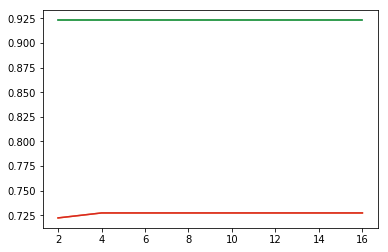

In [44]:
plot(dimensions,accuracieskn,f1scoreskn,accuraciesnb,f1scoresnb)

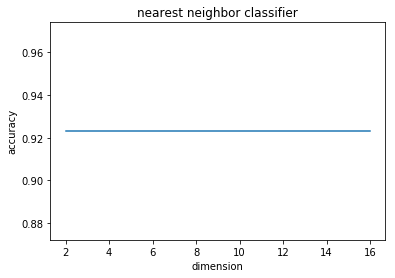

In [46]:
plt.plot(dimensions,accuracieskn)
plt.title('nearest neighbor classifier')
plt.xlabel('dimension')
plt.ylabel('accuracy')
plt.show()

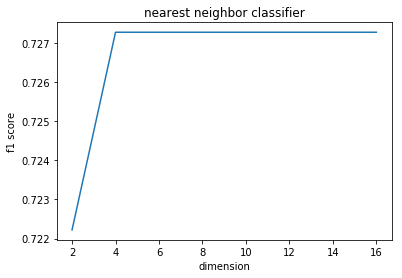

In [49]:
plt.plot(dimensions,f1scoreskn)
plt.title('nearest neighbor classifier')
plt.xlabel('dimension')
plt.ylabel('f1 score')
plt.show()